In [1]:
import numpy as np
import pandas as pd

application_test = pd.read_csv("application_test.csv")
application_train = pd.read_csv("application_train.csv")
'''
bureau = pd.read_csv("home-credit-default-risk/bureau.csv")
bureau_balance = pd.read_csv("home-credit-default-risk/bureau_balance.csv")
credit_card_balance = pd.read_csv("home-credit-default-risk/credit_card_balance.csv")
installments_payments = pd.read_csv("home-credit-default-risk/installments_payments.csv")
POS_CASH_balance = pd.read_csv("home-credit-default-risk/POS_CASH_balance.csv")
previous_application = pd.read_csv("home-credit-default-risk/previous_application.csv")
sample_submission = pd.read_csv("home-credit-default-risk/sample_submission.csv")
'''

'\nbureau = pd.read_csv("home-credit-default-risk/bureau.csv")\nbureau_balance = pd.read_csv("home-credit-default-risk/bureau_balance.csv")\ncredit_card_balance = pd.read_csv("home-credit-default-risk/credit_card_balance.csv")\ninstallments_payments = pd.read_csv("home-credit-default-risk/installments_payments.csv")\nPOS_CASH_balance = pd.read_csv("home-credit-default-risk/POS_CASH_balance.csv")\nprevious_application = pd.read_csv("home-credit-default-risk/previous_application.csv")\nsample_submission = pd.read_csv("home-credit-default-risk/sample_submission.csv")\n'

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = application_train

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.TARGET.sum()

24825

In [6]:
len(df.TARGET)

307511

In [7]:
24825/307511*100

8.072881945686495

In [8]:
df.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [9]:
df.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [10]:
df.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [11]:
df.CNT_CHILDREN.isna().sum()

0

In [12]:
df.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
plt.rcParams.update({
    'axes.prop_cycle': plt.rcParamsDefault['axes.prop_cycle'],
    'axes.facecolor': plt.rcParamsDefault['axes.facecolor'],
    'axes.edgecolor': plt.rcParamsDefault['axes.edgecolor'],
    'axes.labelcolor': plt.rcParamsDefault['axes.labelcolor'],
    'figure.facecolor': plt.rcParamsDefault['figure.facecolor'],
    'grid.color': plt.rcParamsDefault['grid.color'],
    'text.color': plt.rcParamsDefault['text.color'],
    'xtick.color': plt.rcParamsDefault['xtick.color'],
    'ytick.color': plt.rcParamsDefault['ytick.color'],
    'lines.color': plt.rcParamsDefault['lines.color'],
})

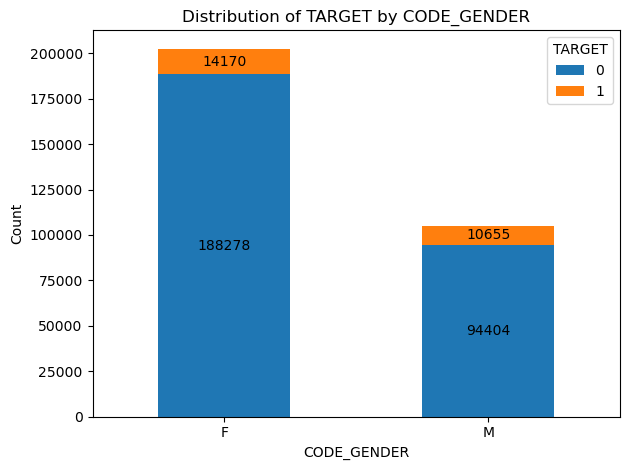

In [15]:
df_filtered = df[df['CODE_GENDER'] != 'XNA']
gender_target_counts = df_filtered.groupby(['CODE_GENDER', 'TARGET']).size().unstack()

# Plotting the distribution with labels
ax = gender_target_counts.plot.bar(stacked=True)
plt.title('Distribution of TARGET by CODE_GENDER')
plt.xlabel('CODE_GENDER')
plt.ylabel('Count')

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

# Adding legend and plot labels
#plt.legend(title='TARGET', labels=['Non-default', 'Default'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(False)
plt.show()

In [16]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'] / -365.25  # Assuming negative values for 'DAYS_BIRTH'

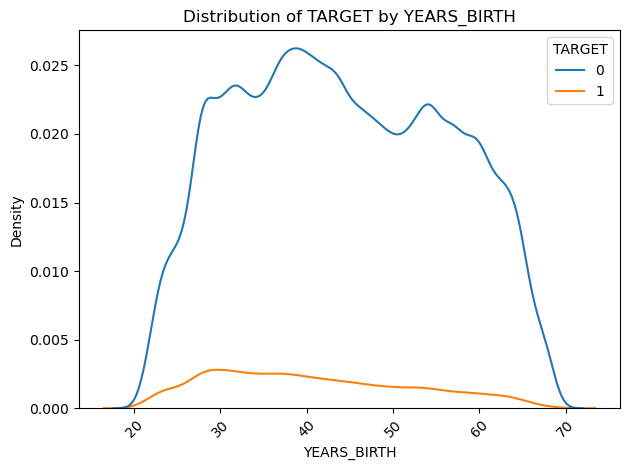

In [17]:
sns.kdeplot(data=df, x='YEARS_BIRTH', hue='TARGET')

plt.title('Distribution of TARGET by YEARS_BIRTH')
plt.xlabel('YEARS_BIRTH')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

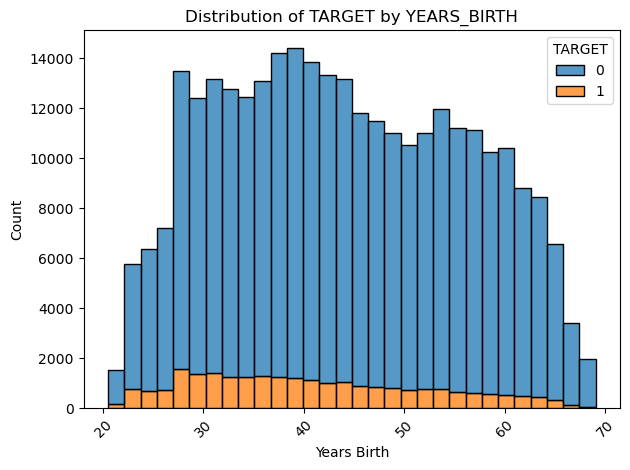

In [18]:
# Plotting the distribution of TARGET by YEARS_BIRTH using Seaborn
sns.histplot(data=df, x='YEARS_BIRTH', hue='TARGET', multiple='stack', edgecolor='k', bins=30)

plt.title('Distribution of TARGET by YEARS_BIRTH')
plt.xlabel('Years Birth')
plt.ylabel('Count')
#plt.legend(title='TARGET', labels=['Non-default', 'Default'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

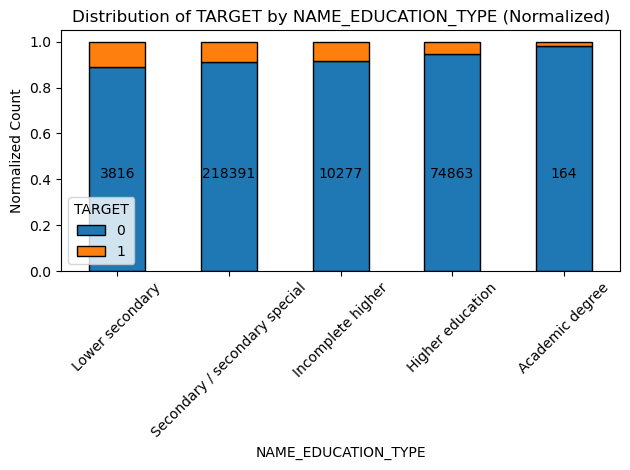

In [19]:
# Grouping the data by 'NAME_EDUCATION_TYPE' and 'TARGET', and counting the occurrences
education_target_counts = df.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).size().unstack()

# Define the custom order for education levels
education_order = [
    'Lower secondary',
    'Secondary / secondary special',
    'Incomplete higher',
    'Higher education',
    'Academic degree'
]

# Reorder the rows based on the custom order
education_target_counts = education_target_counts.reindex(education_order)

# Normalize the counts by dividing by the sum of counts in each 'NAME_EDUCATION_TYPE' group
education_target_counts_norm = education_target_counts.div(education_target_counts.sum(axis=1), axis=0)

# Plotting the normalized distribution using Matplotlib
ax = education_target_counts_norm.plot(kind='bar', stacked=True, edgecolor='k')

plt.title('Distribution of TARGET by NAME_EDUCATION_TYPE (Normalized)')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Normalized Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar with the total number of observations for each education type
for i, (idx, row) in enumerate(education_target_counts_norm.iterrows()):
    total_count = education_target_counts.loc[idx].sum()  # Calculate total count for the category
    ax.annotate(f'{total_count}', xy=(i, row.sum()), xytext=(0, -100), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

plt.grid(False)
plt.show()

In [20]:
df.NAME_FAMILY_STATUS.value_counts().index

Index(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow', 'Unknown'],
      dtype='object', name='NAME_FAMILY_STATUS')

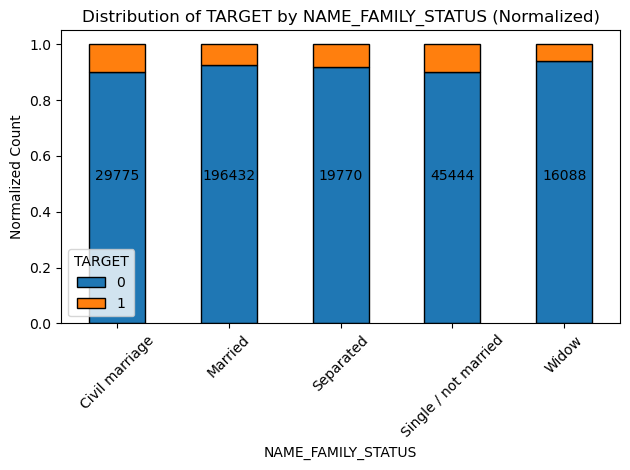

In [21]:
df_filtered_2 = df[df['NAME_FAMILY_STATUS'] != 'Unknown']

# Grouping the data by 'NAME_FAMILY_STATUS' and 'TARGET', and counting the occurrences
family_status_target_counts = df_filtered_2.groupby(['NAME_FAMILY_STATUS', 'TARGET']).size().unstack()

# Normalize the counts by dividing by the sum of counts in each 'NAME_FAMILY_STATUS' group
family_status_target_counts_norm = family_status_target_counts.div(family_status_target_counts.sum(axis=1), axis=0)

# Plotting the normalized distribution using Matplotlib
ax = family_status_target_counts_norm.plot(kind='bar', stacked=True, edgecolor='k')

plt.title('Distribution of TARGET by NAME_FAMILY_STATUS (Normalized)')
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Normalized Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar with the percentage distribution
for i, (idx, row) in enumerate(family_status_target_counts_norm.iterrows()):
    total_count = family_status_target_counts.loc[idx].sum()  # Calculate total count for the category
    ax.annotate(f'{total_count}', xy=(i, row.sum()), xytext=(0, -100), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

plt.grid(False)
plt.show()

In [22]:
df.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [23]:
df.OWN_CAR_AGE.isna().sum()

202929

In [24]:
df.OWN_CAR_AGE.value_counts()

OWN_CAR_AGE
7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
69.0       1
50.0       1
47.0       1
48.0       1
52.0       1
Name: count, Length: 62, dtype: int64

<Axes: >

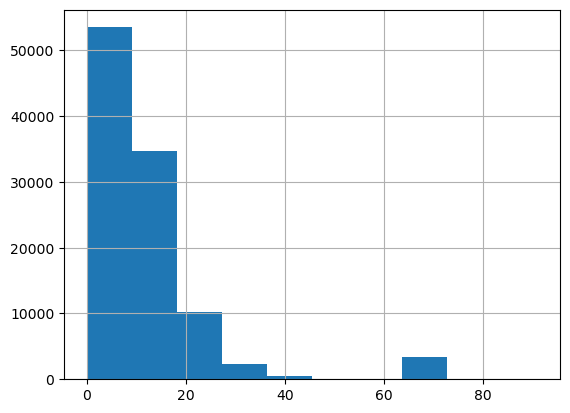

In [25]:
df.OWN_CAR_AGE.hist()

In [26]:
df.FLAG_OWN_REALTY.value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

In [27]:
df.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

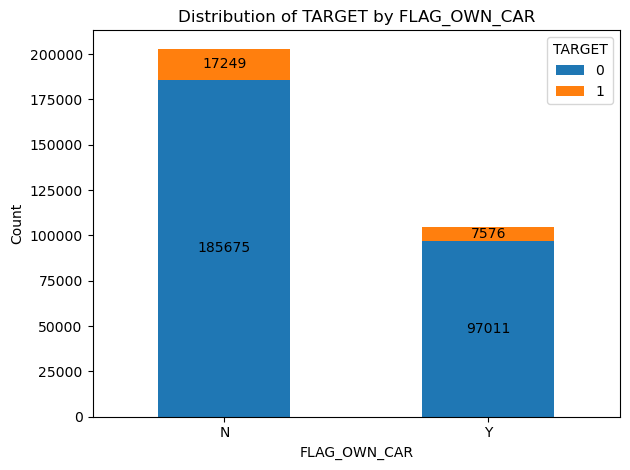

In [28]:
own_car_counts = df.groupby(['FLAG_OWN_CAR', 'TARGET']).size().unstack()

# Plotting the distribution with labels
ax = own_car_counts.plot.bar(stacked=True)
plt.title('Distribution of TARGET by FLAG_OWN_CAR')
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Count')

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

# Adding legend and plot labels
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(False)
plt.show()

In [29]:
df.CNT_CHILDREN.isna().sum()

0

In [30]:
df.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [31]:
df.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

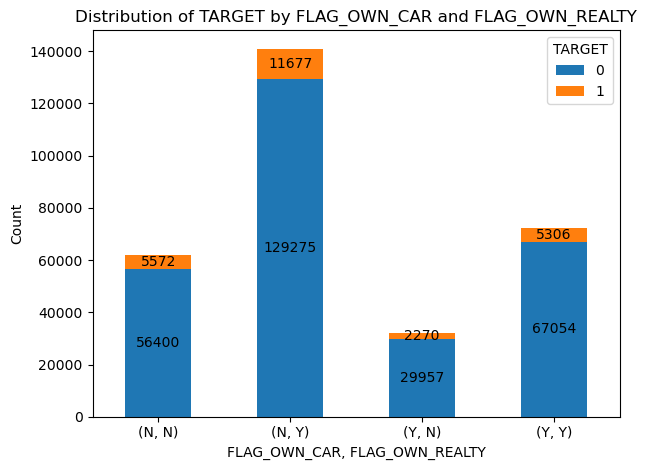

In [32]:
# Assuming your data is in a pandas DataFrame named 'df'
own_counts = df.groupby(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TARGET']).size().unstack()

# Plotting the distribution with labels
ax = own_counts.plot.bar(stacked=True)
plt.title('Distribution of TARGET by FLAG_OWN_CAR and FLAG_OWN_REALTY')
plt.xlabel('FLAG_OWN_CAR, FLAG_OWN_REALTY')
plt.ylabel('Count')

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

# Adding legend and plot labels
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(False)

plt.show()

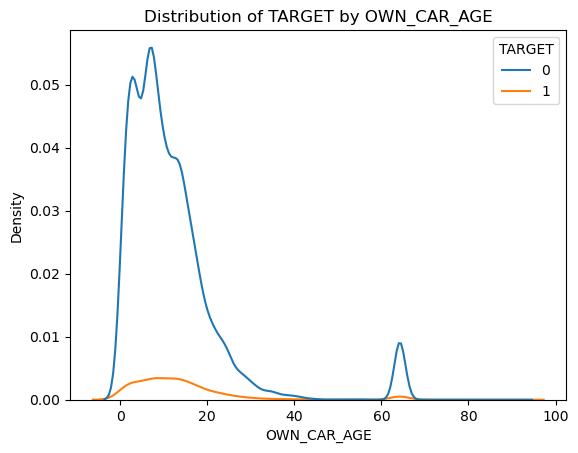

In [33]:
# Filter out rows where OWN_CAR_AGE is not null
filtered_data = df[df['OWN_CAR_AGE'].notnull()]

# Create a histogram with hue as TARGET
# sns.histplot(data=filtered_data, x='OWN_CAR_AGE', hue='TARGET', multiple='stack', bins=20)
sns.kdeplot(data=filtered_data, x='OWN_CAR_AGE', hue='TARGET')

# Adding labels and title
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('Density')
plt.title('Distribution of TARGET by OWN_CAR_AGE')
plt.grid(False)

# Show the plot
plt.show()

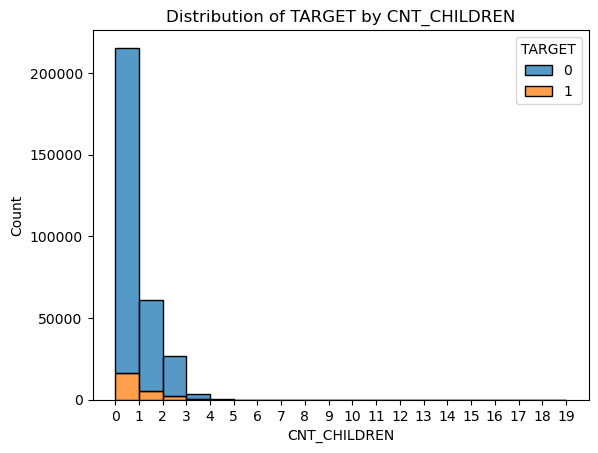

In [34]:
sns.histplot(data=df, x='CNT_CHILDREN', hue='TARGET', multiple='stack', bins=19)

# Adding labels and title
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Count')
plt.title('Distribution of TARGET by CNT_CHILDREN')
plt.grid(False)

# Set x-ticks to display only whole numbers
plt.xticks(range(int(df['CNT_CHILDREN'].min()), int(df['CNT_CHILDREN'].max()) + 1))

# Show the plot
plt.show()

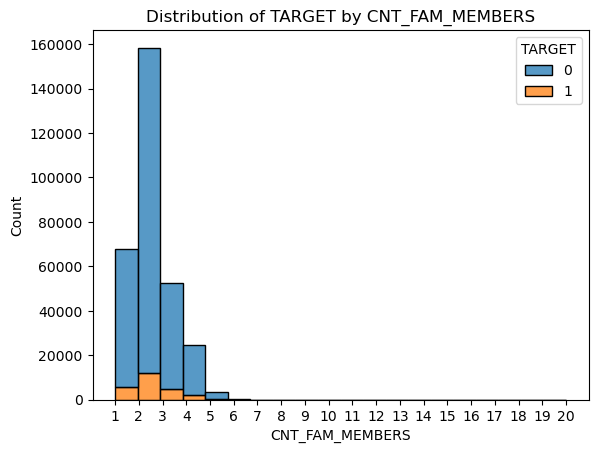

In [35]:
sns.histplot(data=df, x='CNT_FAM_MEMBERS', hue='TARGET', multiple='stack', bins=20)

# Adding labels and title
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('Count')
plt.title('Distribution of TARGET by CNT_FAM_MEMBERS')
plt.grid(False)

# Set x-ticks to display only whole numbers
plt.xticks(range(int(df['CNT_FAM_MEMBERS'].min()), int(df['CNT_FAM_MEMBERS'].max()) + 1))

# Show the plot
plt.show()

In [36]:
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [37]:
df.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [38]:
df.OCCUPATION_TYPE.isna().sum()

96391

In [39]:
df.NAME_INCOME_TYPE.isna().sum()

0

In [40]:
df.REGION_POPULATION_RELATIVE.isna().sum()

0

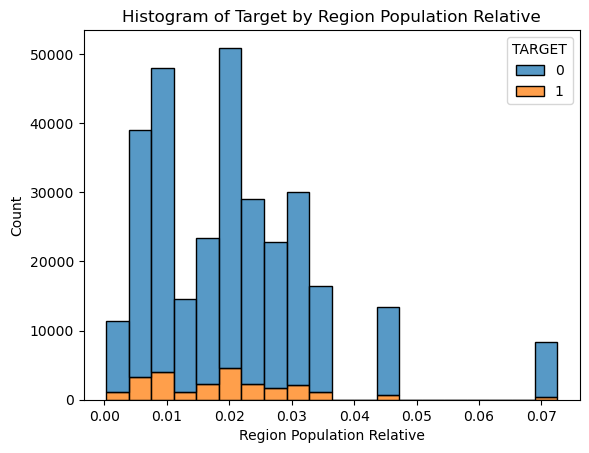

In [41]:
sns.histplot(data=df, x='REGION_POPULATION_RELATIVE', hue='TARGET', multiple='stack', bins=20)

# Adding labels and title
plt.xlabel('Region Population Relative')
plt.ylabel('Count')
plt.title('Histogram of Target by Region Population Relative')
plt.grid(False)

# Show the plot
plt.show()

In [42]:
df.REGION_RATING_CLIENT.value_counts()

REGION_RATING_CLIENT
2    226984
3     48330
1     32197
Name: count, dtype: int64

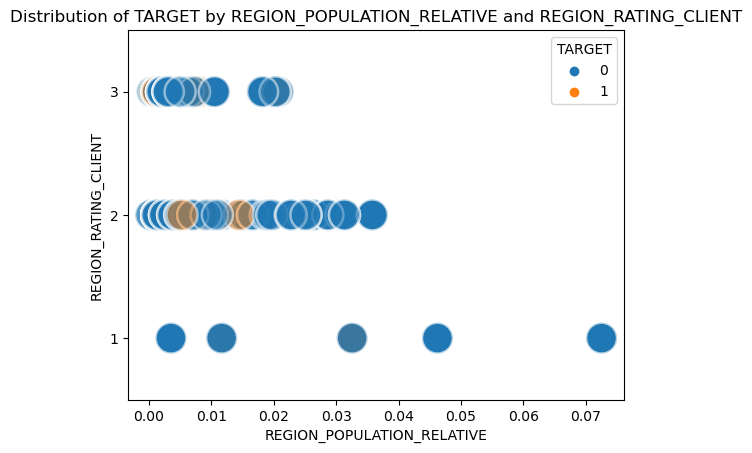

In [43]:
sns.scatterplot(data=df, x='REGION_POPULATION_RELATIVE', y='REGION_RATING_CLIENT', hue='TARGET', alpha=0.5, s=500)

# Limit y-axis to show only values 1, 2, and 3
plt.ylim(0.5, 3.5)
plt.yticks([1, 2, 3])

# Adding labels and title
plt.xlabel('REGION_POPULATION_RELATIVE')
plt.ylabel('REGION_RATING_CLIENT')
plt.title('Distribution of TARGET by REGION_POPULATION_RELATIVE and REGION_RATING_CLIENT')
plt.grid(False)

# Add legend
plt.legend(title='TARGET')

# Show the plot
plt.show()

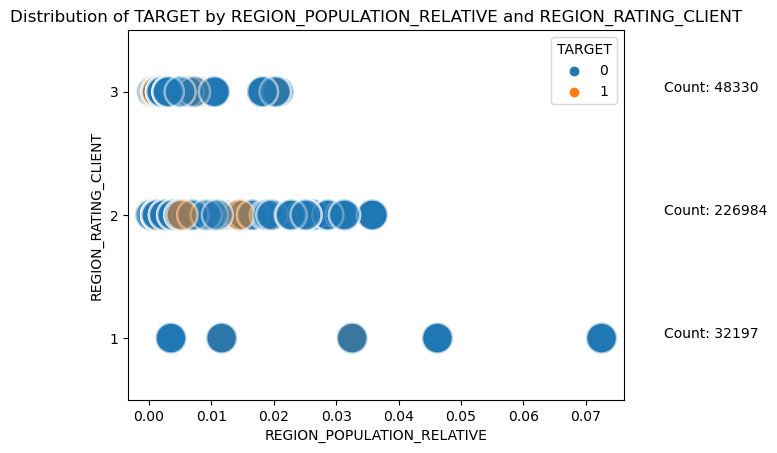

In [44]:
# Group by REGION_RATING_CLIENT and count the occurrences
rating_counts = df.groupby('REGION_RATING_CLIENT').size()

# Create a scatter plot with transparency and hue
scatter = sns.scatterplot(data=df, x='REGION_POPULATION_RELATIVE', y='REGION_RATING_CLIENT', hue='TARGET', alpha=0.5, s=500)

# Limit y-axis to show only values 1, 2, and 3
plt.ylim(0.5, 3.5)
plt.yticks([1, 2, 3])

# Set the labels for each point based on the count of REGION_RATING_CLIENT
for idx, count in enumerate(rating_counts):
    scatter.text(df['REGION_POPULATION_RELATIVE'].max() + 0.01, idx + 1, f'Count: {count}')

# Adding labels and title
plt.xlabel('REGION_POPULATION_RELATIVE')
plt.ylabel('REGION_RATING_CLIENT')
plt.title('Distribution of TARGET by REGION_POPULATION_RELATIVE and REGION_RATING_CLIENT')
plt.grid(False)

# Add legend
plt.legend(title='TARGET')

# Show the plot
plt.show()

<Axes: >

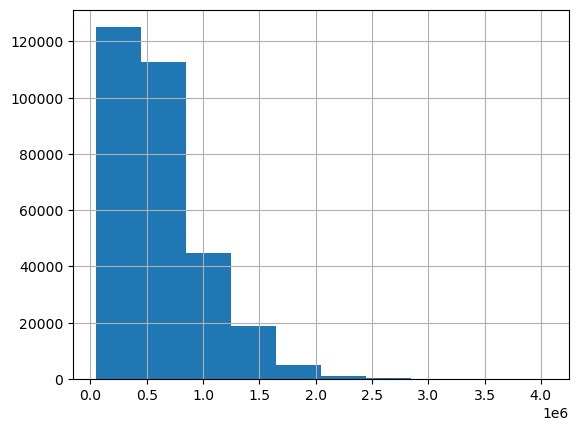

In [45]:
df.AMT_CREDIT.hist()

<Axes: >

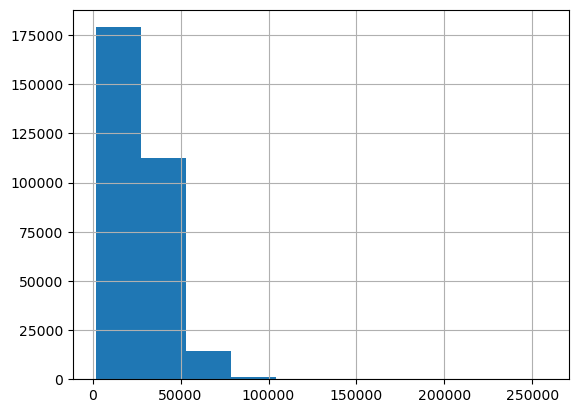

In [46]:
df.AMT_ANNUITY.hist()

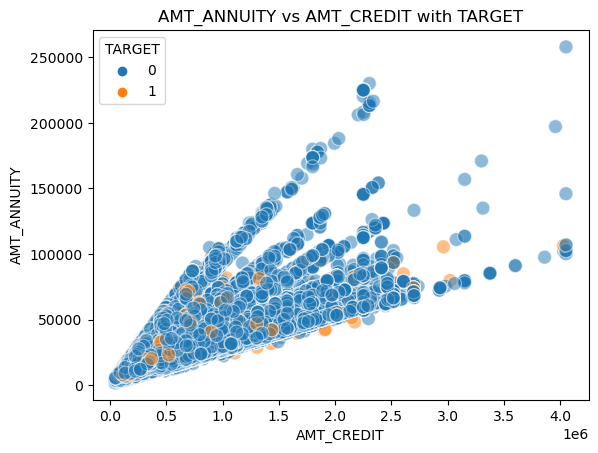

In [47]:
scatter = sns.scatterplot(data=df, x='AMT_CREDIT', y='AMT_ANNUITY', hue='TARGET', alpha=0.5, s=100)

# Adding labels and title
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.title('AMT_ANNUITY vs AMT_CREDIT with TARGET')
plt.grid(False)

# Add legend
plt.legend(title='TARGET')

# Show the plot
plt.show()

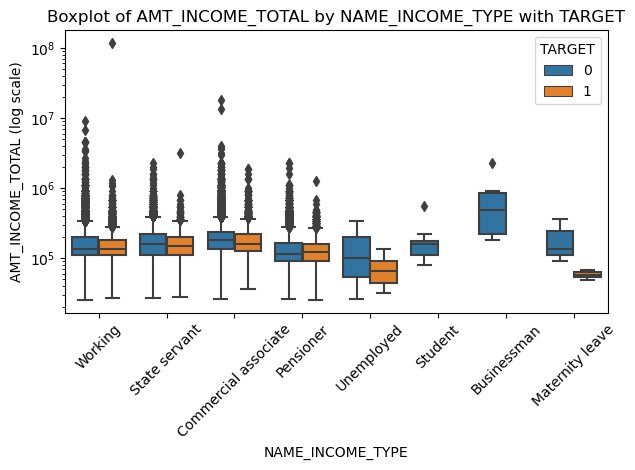

In [48]:
sns.boxplot(data=df, x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET')

plt.title('Boxplot of AMT_INCOME_TOTAL by NAME_INCOME_TYPE with TARGET')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('AMT_INCOME_TOTAL (log scale)')
plt.xticks(rotation=45)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.tight_layout()
plt.grid(False)
plt.legend(title='TARGET')
plt.show()

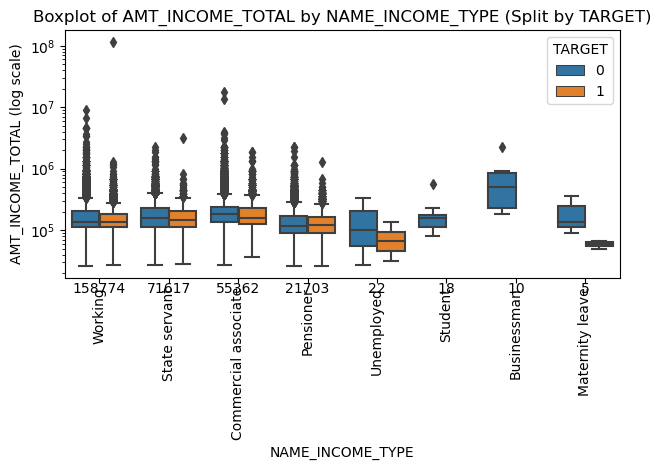

In [49]:
sns.boxplot(data=df, x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET')

# Annotate boxplot with count of observations by NAME_INCOME_TYPE
counts = df['NAME_INCOME_TYPE'].value_counts()
for i, income_type in enumerate(counts.index):
    plt.text(i, df['AMT_INCOME_TOTAL'].max() * 0.00008, f'{counts[income_type]}', ha='center')

plt.title('Boxplot of AMT_INCOME_TOTAL by NAME_INCOME_TYPE (Split by TARGET)')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('AMT_INCOME_TOTAL (log scale)')
plt.xticks(rotation=90)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.tight_layout()
plt.grid(False)
plt.legend(title='TARGET')
plt.show()

In [50]:
df['EXT_SOURCES'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,EXT_SOURCES
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.902806,0.161787
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.900068,0.466757
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [51]:
df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].corr()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


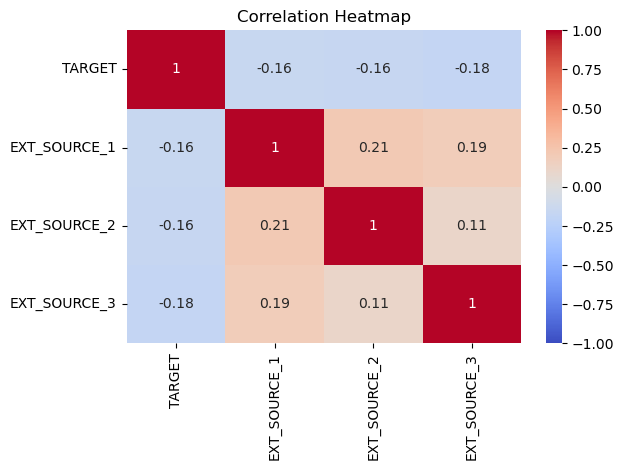

In [52]:
# Calculate the correlation matrix
corr_matrix = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

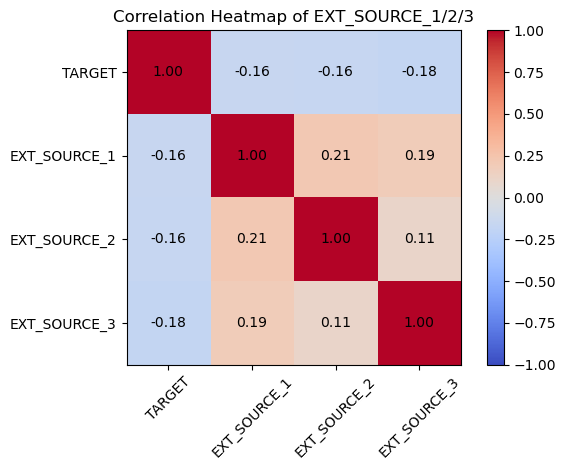

In [53]:
# Calculate the correlation matrix for all variables in the DataFrame
corr_matrix = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].corr()

# Create a heatmap using Matplotlib
heatmap = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(heatmap)

# Display the correlation scores inside the heatmap cells
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, format(corr_matrix.iloc[i, j], ".2f"),
                 ha="center", va="center", color="black")

# Set x and y tick labels
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index)

# Add labels and title to the heatmap
plt.title('Correlation Heatmap of EXT_SOURCE_1/2/3')

plt.tight_layout()
plt.show()